## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = merged_df.nunique()["Mouse ID"]
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df[merged_df.duplicated()]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
#clean dataset with the duplicate removed
clean_df = merged_df[merged_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = clean_df.nunique()["Mouse ID"]
new_mice_number

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#grouping drug regimen data
drugs = clean_df.groupby("Drug Regimen")

#calculating tumor volume mean based on drug regimen
drug_mean = drugs["Tumor Volume (mm3)"].mean()

#calculating tumor volume median based on drug regimen
drug_median = drugs["Tumor Volume (mm3)"].median()

#calculating tumor volume variance based on drug regimen
drug_variance = drugs["Tumor Volume (mm3)"].var()

#calculating tumor volume standard deviation based on drug regimen
drug_std = drugs["Tumor Volume (mm3)"].std()

#calculating tumor volume standard error of the mean based on drug regimen
drug_sem = drugs["Tumor Volume (mm3)"].sem()

#dataframe for summary statistics
sum_stats_df = pd.DataFrame({"Tumor Volume (mm3) Mean": drug_mean,
                            "Tumor Volume (mm3) Median": drug_median,
                            "Tumor Volume (mm3) Variance": drug_variance,
                            "Tumor Volume (mm3) STD": drug_std,
                            "Tumor Volume (mm3) SEM": drug_sem})
#display dataframe
sum_stats_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) STD,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

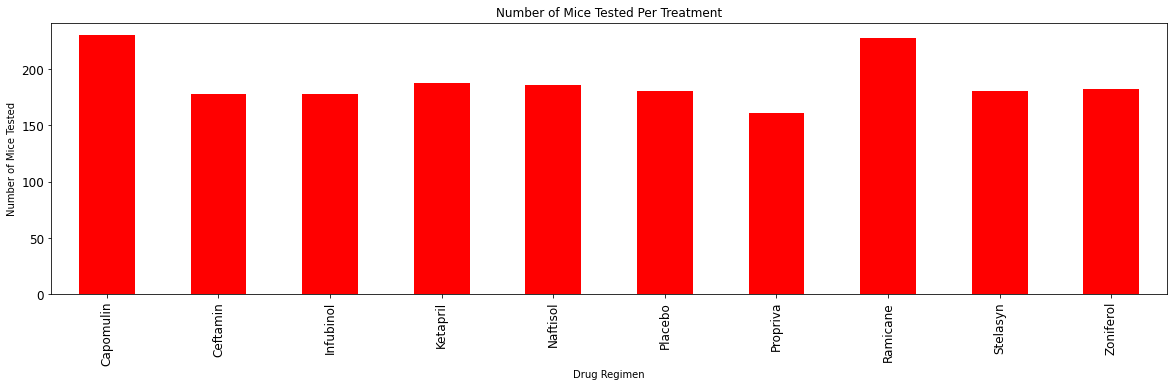

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Split up our data into groups based upon 'Drug Regimen'
drug_group = merged_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#plot the above data into a bar chart
drug_mice_plot = drug_group.plot.bar(figsize=(20,5), color='r', fontsize = 12)

#test run
drug_group

#labels for chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested Per Treatment")

#display bar chart with new labels
plt.show()
plt.tight_layout()

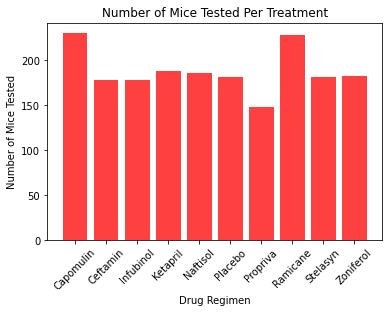

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_group = clean_df.groupby(['Drug Regimen']).count()["Mouse ID"]

#labels for chart
plt.title("Number of Mice Tested Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#bar chart creation using pyplot
plt.bar(drug_group.index.values, drug_group.values, facecolor="red", alpha=0.75, align="center")
plt.xticks(rotation=45)

#display chart
plt.show()

In [17]:
#extra cell for determining values for bar charts
drug_group.head()
drug_group.index.values
drug_group.values

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182])

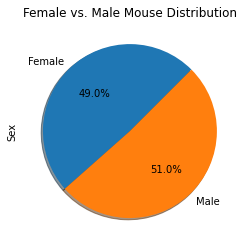

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#groupby sex of mice
gender_mice = clean_df.groupby(["Sex"])
gender_mice

#number of mice
mice_count = gender_mice["Sex"].count()
mice_count

#plot pie chart
mice_pie = mice_count.plot(kind='pie', autopct="%1.1f%%", shadow=True, startangle=45)

#title for chart; ylabel was written previously and I can't remove it for some reason
plt.title("Female vs. Male Mouse Distribution")
plt.axis=("equal")

#display chart
plt.show()

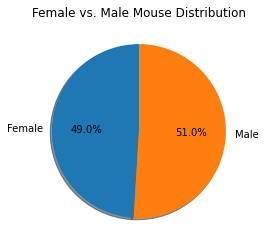

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#groupby sex of mice
gender_mice = clean_df.groupby(["Sex"])
gender_mice

#labels for chart
labels = ["Female", "Male"]

#number of mice
mice_count = gender_mice["Sex"].count()
mice_count

#plot pie chart
plt.pie(mice_count, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

#title for chart
plt.title("Female vs. Male Mouse Distribution")
plt.axis=("equal")

#display chart
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

#test run
max_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_time_df = pd.merge(clean_df, max_time_df, on=["Mouse ID", "Timepoint"], how="right")

#display dataframe
tumor_time_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = tumor_time_df.loc[tumor_time_df['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    
    #print(tumor_volume)
    # add subset 
    tumor_vol_data = tumor_volume
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"-------------------------------------------------")
    print(f"The quartile and outlier information for {drug} is: ")
    print(f"-------------------------------------------------")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

-------------------------------------------------
The quartile and outlier information for Capomulin is: 
-------------------------------------------------
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------
The quartile and outlier information for Ramicane is: 
-------------------------------------------------
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------
The quartile and out

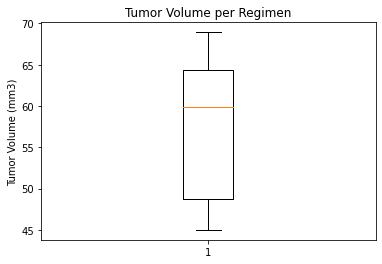

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
plt.show()



## Line and Scatter Plots

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#for one mouse

drug_group = 




,Drug Regimen,Tumor Volume (mm3),Timepoint
Mouse ID,,,
b128,Capomulin,45.000000,0
f932,Ketapril,45.000000,0
g107,Ketapril,45.000000,0
a457,Ketapril,45.000000,0
c819,Ketapril,45.000000,0
...,...,...,...
r944,Capomulin,41.581521,45
u364,Capomulin,31.023923,45
p438,Ceftamin,61.433892,45


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
pull capomulin data
groupby.mean()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

st.pearsonr
st.linregress